Can network fit random labels?

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable
import copy

In [2]:
torch.manual_seed(1)

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.Compose([
                                           
                                                transforms.ToTensor(),
                                               
                                                ]),  
                                           download=True,
                                          )


test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.Compose([
                                                
                                                transforms.ToTensor(),
                                          
                                                ])
                                         )

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))


# Label Randomizer

randomLabel = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = randomLabel

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=100, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

train_dataset size: 60000 
test_dataset size: 10000


In [5]:
class RMNIST(nn.Module):
    def __init__(self):
        super(RMNIST, self).__init__()
        
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):

        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(model, optimizer, epoch, train_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    n_correct = 0
    n_samples = 0
    

    for i, (data, target) in enumerate(train_loader):
        
        #if (i+1)%interval == 0 : print(i+1)  
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()

        # Forward propagation
        prediction = model(data)
        loss = loss_fn(prediction, target)
        #lossSum += loss.detach().numpy()
        
        #Backward prop
        loss.backward()
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples
        
        # print log
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(train_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)

def test(model, epoch, test_loader):
    test_load = test_loader
    model.eval()
    n_correct = 0
    n_samples = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            # max returns (value ,index)
            _,predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            count += 1
            n_correct += (predicted == labels).sum().item()
    
        Test_loss = testLoss/count
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {Test_loss}')
    return netTest_acc1, Test_loss

#torch.manual_seed(1)

rmnist = RMNIST()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rmnist.parameters(), lr=0.0001)

a=[]
for i in rmnist.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

train_loss_arr = []

test_loss_arr = []

epochArr = []
epochs = 1000
interval = 500
for epoch in range(1, epochs + 1):
    epochArr.append(epoch)
    loss, acc = train(rmnist, optimizer, epoch, train_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = test(rmnist, epoch, test_loader)
    test_loss_arr.append(testloss)

Total no of parameters in Model 1: 397510
Train Log:Epoch: 1, Step [1/60000], TrainLoss: 2.3072
Train Log:Epoch: 1, Step [501/60000], TrainLoss: 2.3043
Accuracy of the network on the test images: 8.51% & Test Loss: 2.2908905386924743
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 2.3009
Train Log:Epoch: 2, Step [501/60000], TrainLoss: 2.3005
Accuracy of the network on the test images: 10.77% & Test Loss: 2.2985465359687804
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 2.2975
Train Log:Epoch: 3, Step [501/60000], TrainLoss: 2.2914
Accuracy of the network on the test images: 9.5% & Test Loss: 2.29603241443634
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 2.2963
Train Log:Epoch: 4, Step [501/60000], TrainLoss: 2.2898
Accuracy of the network on the test images: 9.91% & Test Loss: 2.294807913303375
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 2.3040
Train Log:Epoch: 5, Step [501/60000], TrainLoss: 2.2971
Accuracy of the network on the test images: 8.68% & Test Loss: 2.2943769097328186
T

In [14]:
path="/content/drive/MyDrive/CPSC-8430-Deep-Learning-001/HW1/1.3/"

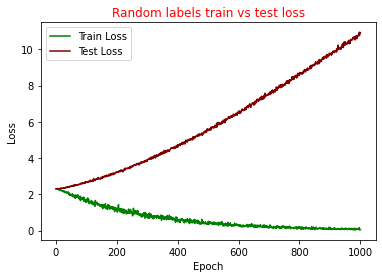

In [15]:
plt.plot(epochArr,train_loss_arr,color="Green")
plt.plot(epochArr,test_loss_arr,color="maroon")
plt.legend(['Train Loss','Test Loss'],loc="best")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Random labels train vs test loss",color = "Red")
plt.savefig(path+'randomMnist2.pdf',
            dpi=300,
            bbox_inches='tight')
plt.show()

2.Number of parameters v.s. Generalization


In [16]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


In [17]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=600, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=100, 
                                          shuffle=False)

In [18]:
class M1(nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M2(nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
class M3(nn.Module):
    def __init__(self,):
        super(M3, self).__init__()

        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M4(nn.Module):
    def __init__(self,):
        super(M4, self).__init__()

        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M5(nn.Module):
    def __init__(self,):
        super(M5, self).__init__()
        
        self.fc1 = nn.Linear(784, 550)
        self.fc2 = nn.Linear(550, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M6(nn.Module):
    def __init__(self,):
        super(M6, self).__init__()

        self.fc1 = nn.Linear(784, 750)
        self.fc2 = nn.Linear(750, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M7(nn.Module):
    def __init__(self,):
        super(M7, self).__init__()

        self.fc1 = nn.Linear(784, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
        
class M8(nn.Module):
    def __init__(self,):
        super(M8, self).__init__()
        
        self.fc1 = nn.Linear(784, 1050)
        self.fc2 = nn.Linear(1050, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M9(nn.Module):
    def __init__(self,):
        super(M9, self).__init__()

        self.fc1 = nn.Linear(784, 1500)
        self.fc2 = nn.Linear(1500, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class M10(nn.Module):
    def __init__(self,):
        super(M10, self).__init__()

        self.fc1 = nn.Linear(784, 2000)
        self.fc2 = nn.Linear(2000, 10)

    def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        
        

In [21]:
input_size = 784
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
num_epochs = 10
dropout = 0.25


In [23]:
#train function
def trainFunc(model,num_epochs):
    model.train()
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    trainAvgLoss = []
    #trainAvgAcc = []
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        lossSum = 0
        for i, (images, labels) in enumerate(train_loader):  
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            _used, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples
            #accSum += acc

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy : {acc} %', end = '\r', flush=True)
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                #print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %')
                train_acc.append(acc)


                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False
                        
        trainAvgLoss.append(lossSum/n_total_steps)
        
        
        print(f'For epoch {epoch} AVG_LOSS: {trainAvgLoss[epoch-1]:.4f}',end = '\r', flush=True)
    return train_epoch,train_losses,train_acc,trainAvgLoss

In [24]:
len(train_loader)

100

In [26]:
def testFunc(model): 
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        testLoss = 0
        count = 0
        for images, labels in test_loader:
            prediction = model(images)
            tLoss = loss_func(prediction, labels)
            testLoss += tLoss
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            count += 1

        testLoss /= count
        netTest_acc1 = 100.0 * n_correct / n_samples

        print(f'Accuracy of the network:{model._get_name()} on the test images: {netTest_acc1:.2f} % & loss of the network:{testLoss:.4f}')
        return netTest_acc1,testLoss

In [29]:
modelArr = [M1,M2,M3,M4,M5,M6,M7,M8,M9,M10]
allTrainLossVal = {}
allTrainAccVal = {}
allTestLossVal = {}
allTestAccVal = {}
allModelParamNo = {}
for i in range (len(modelArr)):
        j = copy.deepcopy(i)
        torch.manual_seed(1)
        j = modelArr[i]()

        loss_func = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(j.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

        a=[]
        for k in j.parameters():
            a.append(torch.numel(k))
        modelTotalPrams = np.sum(a)
        print(f'Total no of parameters in Model{j._get_name()} :{modelTotalPrams}')

        train_epoch,train_losses,train_acc,trainAvgLoss = trainFunc(j,num_epochs)

        testAcc,testLoss = testFunc(j)

        allTrainLossVal[j._get_name()] = trainAvgLoss
        allTrainAccVal[j._get_name()] = train_acc
        allTestLossVal[j._get_name()] = testLoss
        allTestAccVal[j._get_name()] = testAcc     
        allModelParamNo[j._get_name()] = modelTotalPrams 

Total no of parameters in ModelM1 :39760
Max Epoch Reached
Accuracy of the network:M1 on the test images: 95.25 % & loss of the network:0.1607
Total no of parameters in ModelM2 :79510
Max Epoch Reached
Accuracy of the network:M2 on the test images: 96.45 % & loss of the network:0.1240
Total no of parameters in ModelM3 :198760
Max Epoch Reached
Accuracy of the network:M3 on the test images: 97.25 % & loss of the network:0.0887
Total no of parameters in ModelM4 :397510
Max Epoch Reached
Accuracy of the network:M4 on the test images: 97.63 % & loss of the network:0.0742
Total no of parameters in ModelM5 :437260
Max Epoch Reached
Accuracy of the network:M5 on the test images: 97.77 % & loss of the network:0.0708
Total no of parameters in ModelM6 :596260
Max Epoch Reached
Accuracy of the network:M6 on the test images: 97.96 % & loss of the network:0.0661
Total no of parameters in ModelM7 :795010
Max Epoch Reached
Accuracy of the network:M7 on the test images: 97.98 % & loss of the network:0

In [31]:
model_TrainLoss = [np.min(allTrainLossVal['M1']),np.min(allTrainLossVal['M2']),
              np.min(allTrainLossVal['M3']),np.min(allTrainLossVal['M4']),
              np.min(allTrainLossVal['M5']),np.min(allTrainLossVal['M6']),
              np.min(allTrainLossVal['M7']),np.min(allTrainLossVal['M8']),
              np.min(allTrainLossVal['M9']),np.min(allTrainLossVal['M10'])     
            ]
model_Tparams = [allModelParamNo['M1'],allModelParamNo['M2'],allModelParamNo['M3'],
                allModelParamNo['M4'],allModelParamNo['M5'],allModelParamNo['M6'],
                allModelParamNo['M7'],allModelParamNo['M8'],allModelParamNo['M9'],
                allModelParamNo['M10']
                ]
model_Testloss = [allTestLossVal['M1'],allTestLossVal['M2'],allTestLossVal['M3'],allTestLossVal['M4'],allTestLossVal['M5'],
                  allTestLossVal['M6'],allTestLossVal['M7'],allTestLossVal['M8'],allTestLossVal['M9'],allTestLossVal['M10']     
                ]



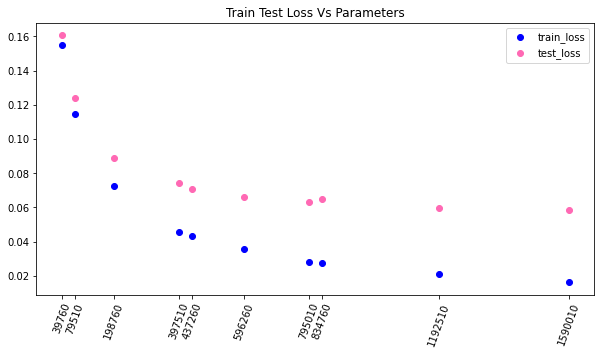

In [37]:
#Train/TestLoss Vs Param plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.scatter(model_Tparams,model_TrainLoss,color="blue")
plt.scatter(model_Tparams,model_Testloss,color="hotpink")
plt.xticks(model_Tparams, model_Tparams,rotation=70)
plt.legend(['train_loss','test_loss'])
plt.title('Train Test Loss Vs Parameters')

plt.savefig(path+'Hw1.3P0Loss.jpg',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')
plt.show()

In [34]:
#plot Acc vs param
model_TrainAcc= [np.max(allTrainAccVal['M1']),np.max(allTrainAccVal['M2']),
              np.max(allTrainAccVal['M3']),np.max(allTrainAccVal['M4']),
              np.max(allTrainAccVal['M5']),np.max(allTrainAccVal['M6']),
              np.max(allTrainAccVal['M7']),np.max(allTrainAccVal['M8']),
              np.max(allTrainAccVal['M9']),np.max(allTrainAccVal['M10'])     
                ]
model_TestAcc = [allTestAccVal['M1'],allTestAccVal['M2'],allTestAccVal['M3'],allTestAccVal['M4'],allTestAccVal['M5'],
                  allTestAccVal['M6'],allTestAccVal['M7'],allTestAccVal['M8'],allTestAccVal['M9'],allTestAccVal['M10']     
                ]


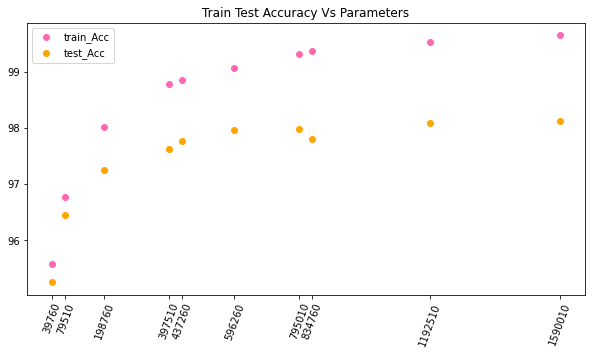

In [36]:
#Train/TestAcc Vs Param plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.scatter(model_Tparams,model_TrainAcc,color="Hotpink")
plt.scatter(model_Tparams,model_TestAcc,color="orange")
plt.xticks(model_Tparams, model_Tparams,rotation=70)
plt.legend(['train_Acc','test_Acc'])
plt.title('Train Test Accuracy Vs Parameters')
plt.savefig(path+'Hw1.3P0Acc.jpg',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')
plt.show()

1.3.3 Flatness v.s. Generalization - part1


In [40]:
class M1(nn.Module):
  def __init__(self,):
        super(M1, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        
  def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

In [45]:
# Data loader func
def train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size = batch_size, 
                                           shuffle=True)
    return train_loader


def test_loader(batch_size):
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
    return test_loader

In [46]:
#train function
def trainFunc(model,num_epochs,train_batch_size,status):
    model.train()
    print('strated')
    train_load = train_loader(train_batch_size)
    n_total_steps = len(train_load)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    trainAvgLossArr = []
    trainAvgAccArr = []

    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        lossSum =0
        totalacc =0

        for i, (images, labels) in enumerate(train_load):  
            
            images, labels = Variable(images),Variable(labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            # Backward and optimize
            loss.backward()
            
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples
            totalacc += acc

            train_losses.append(loss.item())
            train_acc.append(acc)
            train_epoch.append(epoch)

            if (i+1) % status == 0:
                print (f'Train O/P: Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end= '\r',flush = True)
   
                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False

       
        epochAcc = totalacc/(i+1)
        trainAvgLossArr.append(lossSum/n_total_steps)    
        trainAvgAccArr.append(epochAcc)

    return train_epoch,train_losses,train_acc,trainAvgLossArr,trainAvgAccArr

In [47]:
# Training Model with batch size=64
torch.manual_seed(1)

learning_rate = 0.0015
mBatch1 = M1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4

optimizer = torch.optim.Adam(mBatch1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

#optimizer = torch.optim.SGD(mBatch1.parameters(), lr=learning_rate)

a=[]
for i in mBatch1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={64} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=64 is:397510


In [48]:
max_epochs = 15
train_batch_size = 64
status = 500
B1_train_epoch,B1_train_losses,B1_train_acc,B1trainAvgLossArr,B1trainAvgAccArr  = trainFunc(mBatch1,max_epochs,train_batch_size,status)

strated
Max Epoch Reached


In [49]:
torch.manual_seed(1)

learning_rate = 0.0015
mBatch2 = M1()
loss_func = nn.CrossEntropyLoss()
weight_decay_val = 1e-4
optimizer = torch.optim.Adam(mBatch2.parameters(), lr=learning_rate, weight_decay=weight_decay_val) 
a=[]
for i in mBatch2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={1000} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=1000 is:397510


In [50]:
max_epochs = 15
train_batch_size = 1000
status = 5
B2_train_epoch,B2_train_losses,B2_train_acc,B2trainAvgLossArr,B2trainAvgAccArr = trainFunc(mBatch2,max_epochs,train_batch_size,status)

strated
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached


In [51]:
epochArr = np.array(np.linspace(1,max_epochs,max_epochs))

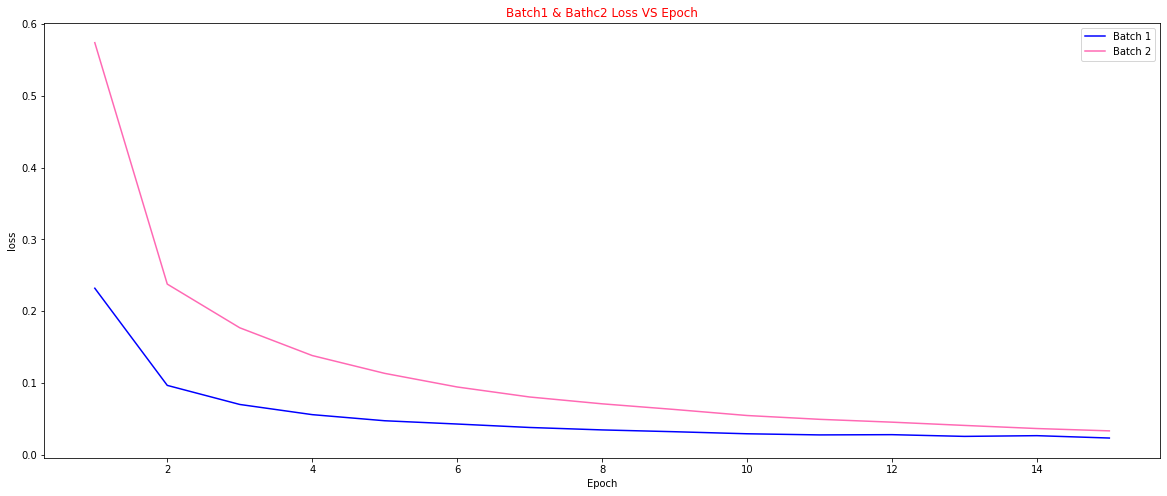

In [57]:
#Plotting Loss plot for both Batch 1 and Batch 2 models
#B2_train_epoch,B2_train_losses,B2_train_acc
plt.figure(figsize=(20, 8))
plt.plot(epochArr,B1trainAvgLossArr,color="blue")
plt.plot(epochArr,B2trainAvgLossArr,color="hotpink")
plt.title('Batch1 & Bathc2 Loss VS Epoch' ,color='red')
plt.legend(['Batch 1','Batch 2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.savefig(path+'part1fig1',
            format='jpeg',
            dpi=700,
            bbox_inches='tight')
plt.show()

In [53]:
batch1_param = torch.nn.utils.parameters_to_vector(mBatch1.parameters())
print(batch1_param,'\nlen:',len(batch1_param))

tensor([-7.8686e-38, -3.2136e-38,  5.9047e-38,  ..., -1.9592e-01,
         4.0731e-01,  8.5190e-02], grad_fn=<CatBackward0>) 
len: 397510


In [54]:
batch2_param = torch.nn.utils.parameters_to_vector(mBatch2.parameters())
print(batch2_param,'\nlen:',len(batch2_param))

tensor([ 4.2678e-23, -2.2518e-23, -2.0251e-23,  ...,  4.4161e-02,
        -2.9274e-02, -2.9911e-02], grad_fn=<CatBackward0>) 
len: 397510


In [59]:
alpha = np.linspace(-2.0, 2.0, num=31)
print(alpha)

[-2.         -1.86666667 -1.73333333 -1.6        -1.46666667 -1.33333333
 -1.2        -1.06666667 -0.93333333 -0.8        -0.66666667 -0.53333333
 -0.4        -0.26666667 -0.13333333  0.          0.13333333  0.26666667
  0.4         0.53333333  0.66666667  0.8         0.93333333  1.06666667
  1.2         1.33333333  1.46666667  1.6         1.73333333  1.86666667
  2.        ]


In [60]:
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    thetaArr.append(theta)

In [61]:
def testFunction(model,loss_func,testLoader,test_batch_size): 
    test_loader = testLoader
    test_load = test_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        testLoss = 0
        count =0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            count +=1

    netTest_loss = testLoss/count
    netTest_acc1 = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {netTest_acc1} & Test Loss: {netTest_loss} %', end="\r", flush= True)
    return netTest_acc1, netTest_loss

In [62]:
modelsTrainEpochArr = []
modelsTrainLossArr = []
modelsTrainAccArr = []
modelsTestLossArr = []
modelsTestAccArr = []

for i in range (len(thetaArr)):
    #torch.manual_seed(1)
    
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    j = M1()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=0.0004, weight_decay = 1e-4)
    #optimizer = torch.optim.SGD(j.parameters(), lr=0.001) 

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    max_epochs = 1
    train_batch_size = 500
    status = 100
    # T_train_acc,T_train_losses = testFunction(j,loss_func,train_loader,train_batch_size)
    T_train_epoch,T_train_losses,T_train_acc,T_trainAvgLossArr,T_trainAvgAccArr = trainFunc(j,max_epochs,train_batch_size,status)
    
    
    # modelsTrainLossArr.append(T_train_losses)
    # modelsTrainAccArr.append(T_train_acc)
    modelsTrainLossArr.append(T_trainAvgLossArr)
    modelsTrainAccArr.append(T_trainAvgAccArr)
    
    test_batch_size=500
    T_acc, T_testLoss = testFunction(j,loss_func,test_loader,test_batch_size)
    modelsTestAccArr.append(T_acc)
    modelsTestLossArr.append(T_testLoss)




Total no of parameters in Model Theta 0 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Theta 1 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Theta 2 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Theta 3 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Thet

In [63]:
def meanScore(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meanScore = np.mean(dataArr[i])
        meanModelData.append(meanScore)
    return meanModelData

def minScore(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minScore = np.mean(dataArr[i])
        minModelScore.append(minScore)
    return minModelScore

def maxScore(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxScore = np.max(dataArr[i])
        maxModelScore.append(maxScore)
    return maxModelScore


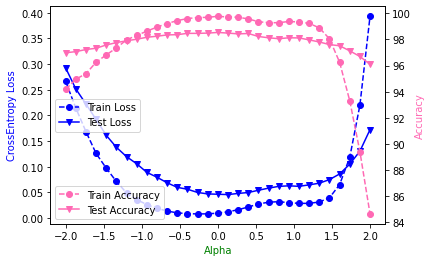

In [64]:
fig,ax=plt.subplots()
ax.plot(alpha,(modelsTrainLossArr),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "blue")


ax2=ax.twinx()
ax2.plot(alpha,(modelsTrainAccArr),color="hotpink",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr,color="hotpink", marker="v")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "hotpink")
ax2.legend(['Train Accuracy','Test Accuracy'],loc="best")

plt.show()
fig.savefig(path+'part1fig2',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [65]:
# Training Model with batch size=600 and Lr 1e-3
torch.manual_seed(1)

learning_rate = 1e-3
mLr1 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr1.parameters(), lr=learning_rate) 

a=[]
for i in mLr1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with Lr={learning_rate} is:{np.sum(a)}')

Total no of parameters in Model with Lr=0.001 is:397510


In [66]:
max_epochs = 5
train_batch_size = 64
status = 10
L1_train_epoch,L1_train_losses,L1_train_acc,L1_trainAvgLossArr,L1_trainAvgAccArr  = trainFunc(mLr1,max_epochs,train_batch_size,status)

strated
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Ma

In [67]:
Lr1_param = torch.nn.utils.parameters_to_vector(mLr1.parameters())
print(Lr1_param,'\nlen:',len(Lr1_param))

tensor([ 0.0184, -0.0158, -0.0069,  ..., -0.0084,  0.0329, -0.0202],
       grad_fn=<CatBackward0>) 
len: 397510


In [68]:
# Training Model with batch size=600 and Lr 1e-2
torch.manual_seed(1)
learning_rate = 1e-2
mLr2 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr2.parameters(), lr=learning_rate) 

a=[]
for i in mLr2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with Lr={learning_rate} is:{np.sum(a)}')

Total no of parameters in Model with Lr=0.01 is:397510


In [69]:
max_epochs = 5
train_batch_size = 64
status = 10
L2_train_epoch,L2_train_losses,L2_train_acc,L2_trainAvgLossArr,L2_trainAvgAccArr  = trainFunc(mLr2,max_epochs,train_batch_size,status)

strated
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Ma

In [70]:
epochArr = np.array(np.linspace(1,max_epochs,max_epochs))

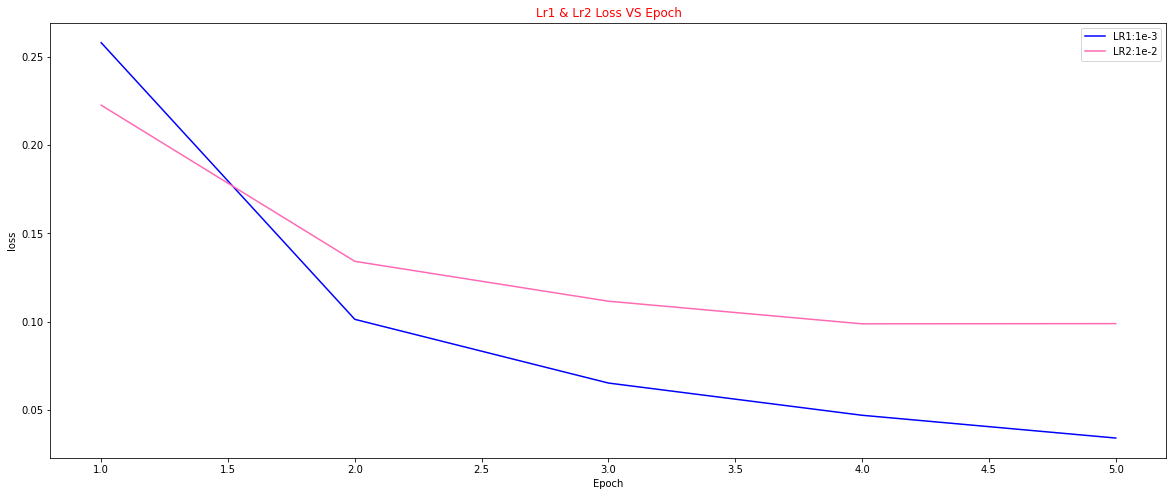

In [89]:
#Plotting Loss plot for both Batch 1 and Batch 2 models
plt.figure(figsize=(20, 8))
plt.plot(epochArr,L1_trainAvgLossArr,color="blue")
plt.plot(epochArr,L2_trainAvgLossArr,color="hotpink")
plt.title('Lr1 & Lr2 Loss VS Epoch',color="red")
plt.legend(['LR1:1e-3','LR2:1e-2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.savefig(path+'part1fig3.pdf',
            dpi=100,
            bbox_inches='tight')
plt.show()


In [72]:
Lr2_param = torch.nn.utils.parameters_to_vector(mLr2.parameters())
print(Lr2_param,'\nlen:',len(Lr2_param))

tensor([ 0.0184, -0.0158, -0.0069,  ..., -0.8934,  1.6514, -0.1386],
       grad_fn=<CatBackward0>) 
len: 397510


In [74]:
modelsTrainEpochArr2 = []
modelsTrainLossArr2 = []
modelsTrainAccArr2 = []
modelsTestLossArr2 = []
modelsTestAccArr2 = []

for i in range (len(thetaArr)):
    torch.manual_seed(1)
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*Lr1_param + alpha[i]*Lr2_param
    j = M1()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3) #,weight_decay = 0.025)

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    max_epochs = 1
    train_batch_size = 1000
    status = 60
    T2_train_epoch,T2_train_losses,T2_train_acc,T2_trainAvgLossArr,T2_trainAvgAccArr = trainFunc(j,max_epochs,train_batch_size,status) #trainFunc(mBatch1,max_epochs,train_batch_size)
    
    
    #modelsTrainEpochArr2.append(T2_trainAvgLossArr)
    modelsTrainLossArr2.append(T2_trainAvgLossArr)
    modelsTrainAccArr2.append(T2_trainAvgAccArr)
    
    test_batch_size=1000
    T2_acc,T2_testLoss = testFunction(j,loss_func,test_loader,test_batch_size)
    modelsTestAccArr2.append(T2_acc)
    modelsTestLossArr2.append(T2_testLoss)

Total no of parameters in Model Theta 0 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Theta 1 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Theta 2 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Theta 3 is:397510
<bound method Module.parameters of M1(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>
strated
Max Epoch Reached
Total no of parameters in Model Thet

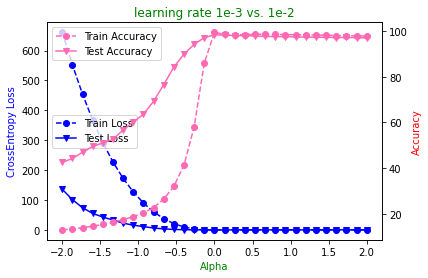

In [76]:
fig,ax=plt.subplots()
ax.plot(alpha,(modelsTrainLossArr2),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr2,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("learning rate 1e-3 vs. 1e-2",color = "green")


ax2=ax.twinx()
ax2.plot(alpha,(modelsTrainAccArr2),color="hotpink",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr2,color="hotpink", marker="v")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "red")
ax2.legend(['Train Accuracy','Test Accuracy'],loc="best")

plt.show()
fig.savefig(path+'part1fig4.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

** Flatness v.s. Generalization – part2 **

In [77]:
class Model(nn.Module):
  def __init__(self,):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        
  def forward(self, x):
        # flatten as one dimension
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [78]:
#train function
def trainFunc(model,num_epochs,train_batch_size):
    model.train()
    print('strated')
    train_load = train_loader(train_batch_size)
    n_total_steps = len(train_load)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    sensitivity=[]
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        lossSum =0
        for i, (images, labels) in enumerate(train_load):  
            #if (i+1)% 60 == 0 : print(i+1)
            images, labels = Variable(images),Variable(labels)
            
            optimizer.zero_grad()
            
            # Forward pass
            prediction = model(images)

            images.requires_grad = True

            loss = loss_func(prediction, labels)
            lossSum += loss

            # Backward and optimize
            loss.backward()
            optimizer.step()

            #Calculation for sensitivity
            froGrad=0
            count =0 
            
        
            for p in model.parameters():
                grad = 0.0
                if p.grad is not None:
                    grad = p.grad
                    froGrad_norm = torch.linalg.norm(grad).numpy()
                    froGrad += froGrad_norm
                    count += 1
            
            sensitivity.append(froGrad/count)

            
            #loss.backward()
            
            #optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            train_losses.append(loss.item())
            train_acc.append(acc)
            train_epoch.append(epoch)
        

            if (i+1) % 10 == 0:
                print (f'Train O/P: Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end= '\r',flush = True)
                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False
                        
        trainAvgLoss = lossSum/i+1
        print("Train Avg loss:",trainAvgLoss)
                        
    return train_epoch,train_losses,train_acc,sensitivity,trainAvgLoss

In [79]:
import copy

In [80]:
batchArr = np.linspace (10,1510,5)
print(batchArr)

[  10.  385.  760. 1135. 1510.]


In [81]:
def testFunction(model,loss_func,test_batch_size): 
    test_load = test_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        testLoss = 0
        count = 0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            count += 1
    netTest_loss = testLoss/count
    netTest_acc1 = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {netTest_loss} ',end= '\r',flush = True)
    return netTest_acc1, netTest_loss

In [82]:
modelsTrainEpochArr = []
modelsTrainLossArr = []
modelsTrainAccArr = []
modelsTestLossArr = []
modelsTestAccArr = []
modelsSensitivityArr = []

temModel = Model ()

a=[]
for k in temModel.parameters():
    a.append(torch.numel(k))

print(f'Total no of parameters in Model :{np.sum(a)}')

for i in range (len(batchArr)):
    torch.manual_seed(1)
    
    j=copy.deepcopy(i) 
    j = Model()
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3, weight_decay= 1e-4)


    max_epochs = 5
    train_batch_size = int(batchArr[i])

    train_epoch,train_losses,train_acc,sensitivity,tvgLoss = trainFunc(j,max_epochs,train_batch_size)

    test_batch_size = int(batchArr[i])

    testAcc, testLoss = testFunction(j,loss_func,test_batch_size)

    
    modelsTrainEpochArr.append(train_epoch)
    modelsTrainLossArr.append(train_losses)
    modelsTrainAccArr.append(train_acc)
    modelsTestAccArr.append(testAcc)
    modelsTestLossArr.append(testLoss)
    modelsSensitivityArr.append(sensitivity)

Total no of parameters in Model :397510
strated
Train Avg loss: tensor(1.1962, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0900, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0724, grad_fn=<AddBackward0>)
Train Avg loss: tensor(1.0631, grad_fn=<AddBackward0>)
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Reached
Max Epoch Re

In [83]:
def meanScore(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meanScore = np.mean(dataArr[i])
        meanModelData.append(meanScore)
    return meanModelData

def minScore(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minScore = np.mean(dataArr[i])
        minModelScore.append(minScore)
    return minModelScore

def maxScore(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxScore = np.max(dataArr[i])
        maxModelScore.append(maxScore)
    return maxModelScore


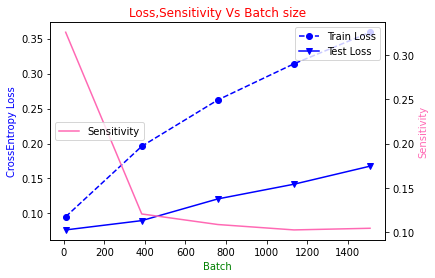

In [84]:
fig,ax=plt.subplots()
ax.plot(batchArr,minScore(modelsTrainLossArr),color="Blue", marker="o",linestyle='dashed')
ax.plot(batchArr,modelsTestLossArr,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="upper right")
ax.set_xlabel("Batch",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("Loss,Sensitivity Vs Batch size",color="red")

ax2=ax.twinx()
ax2.plot(batchArr,minScore(modelsSensitivityArr),color="hotpink")
ax2.set_xlabel("Batch",color="Green")
ax2.set_ylabel("Sensitivity",color = "hotpink")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(path+'part2fig1.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

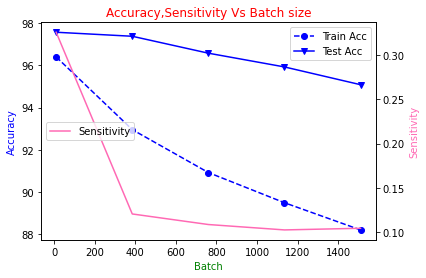

In [86]:
fig,ax=plt.subplots()
ax.plot(batchArr,minScore(modelsTrainAccArr),color="Blue", marker="o",linestyle='dashed')
ax.plot(batchArr,modelsTestAccArr,color="Blue", marker="v")
ax.legend(['Train Acc','Test Acc'],loc="upper right")
ax.set_xlabel("Batch",color="Green")
#ax.set_xscale('log')
ax.set_ylabel("Accuracy",color = "blue")
ax.set_title("Accuracy,Sensitivity Vs Batch size",color="red")

ax2=ax.twinx()
ax2.plot(batchArr,minScore(modelsSensitivityArr),color="hotpink")
ax2.set_xlabel("Batch",color="Green")
ax2.set_ylabel("Sensitivity",color = "hotpink")
ax2.legend(['Sensitivity'],loc="center left")

plt.show()
fig.savefig(path+'part2fig2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')